In [1]:

from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/drive')

# Define the path to the root folder containing subfolders with images
root_folder = "/drive/MyDrive/CS583 Project/Data"


Mounted at /drive


In [5]:
# Initialize lists to store images and their corresponding labels
images = []
labels = []

# Set a limit for the total number of images to load
total_images_to_load = 500

# Function to load images from a subfolder and assign labels
def load_images_from_folder(folder_path, label):
    image_count = 0
    for filename in os.listdir(folder_path):
        if image_count >= total_images_to_load:
            break

        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            images.append(img)
            labels.append(label)
            image_count += 1

# Loop through subfolders and load images with labels
label = 0
for class_folder in os.listdir(root_folder):
    class_folder_path = os.path.join(root_folder, class_folder)
    if os.path.isdir(class_folder_path):
        load_images_from_folder(class_folder_path, label)
        label += 1

# Convert labels to a NumPy array
labels = np.array(labels)

# Create a list of tuples containing images and labels
test_data = list(zip(images, labels))

# Unzip the tuples to separate images and labels
images, labels = zip(*test_data)

# Convert labels to numerical format
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert images and labels to numpy arrays
X = np.array(images)
y = np.array(encoded_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from PIL import Image
import os

from sklearn.preprocessing import LabelEncoder

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, total_images_to_load):
    images = []
    labels = []

    image_count = 0
    for filename in os.listdir(folder_path):
        if image_count >= total_images_to_load:
            break

        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            img = img.resize((224, 224))  # Resize images to match the model input shape
            img_array = np.array(img)
            images.append(img_array)
            labels.append(folder_path.split("/")[-1])  # Extract label from folder path
            image_count += 1

    return np.array(images), np.array(labels)

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()

# Load and preprocess images
X, y = [], []
for class_folder in os.listdir(root_folder):
    class_folder_path = os.path.join(root_folder, class_folder)
    if os.path.isdir(class_folder_path):
        images, labels = load_and_preprocess_images(class_folder_path, total_images_to_load)
        X.extend(images)
        y.extend(labels)

# Convert labels to numerical format
y = label_encoder.fit_transform(y)

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-5-ea405ea4e894>:44: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  X = np.array(images)
<ipython-input-5-ea405ea4e894>:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(images)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to create a CNN model
def create_cnn_model(learning_rate=0.001, num_filters=32, dropout_rate=0.5):
    model = Sequential()
    model.add(Conv2D(num_filters, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


# Create and compile the CNN model
cnn_model = create_cnn_model()

# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5
50/50 [==============================] - 295s 6s/step - loss: 8.2780 - accuracy: 0.4956 - val_loss: 30.1782 - val_accuracy: 0.2950
Epoch 2/5
50/50 [==============================] - 268s 5s/step - loss: 1.4463 - accuracy: 0.5025 - val_loss: 2.5662 - val_accuracy: 0.4875
Epoch 3/5
50/50 [==============================] - 267s 5s/step - loss: 1.1401 - accuracy: 0.5081 - val_loss: 2.2908 - val_accuracy: 0.5925
Epoch 4/5
50/50 [==============================] - 273s 5s/step - loss: 1.1125 - accuracy: 0.5281 - val_loss: 2.8589 - val_accuracy: 0.5675
Epoch 5/5
50/50 [==============================] - 268s 5s/step - loss: 1.1099 - accuracy: 0.5337 - val_loss: 1.1194 - val_accuracy: 0.6350


In [18]:
# Function to create and compile a transfer learning model using MobileNetV2
def create_mobilenet_model():
    base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and compile the MobileNetV2 model
mobilenet_model = create_mobilenet_model()

# Train the MobileNetV2 model
mobilenet_history = mobilenet_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)


9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/5
50/50 [==============================] - 104s 2s/step - loss: 1.1002 - accuracy: 0.5244 - val_loss: 1.0008 - val_accuracy: 0.5600
Epoch 2/5
50/50 [==============================] - 108s 2s/step - loss: 0.8121 - accuracy: 0.6625 - val_loss: 0.8112 - val_accuracy: 0.6400
Epoch 3/5
50/50 [==============================] - 87s 2s/step - loss: 0.7047 - accuracy: 0.7219 - val_loss: 0.8549 - val_accuracy: 0.6500
Epoch 4/5
50/50 [==============================] - 89s 2s/step - loss: 0.6440 - accuracy: 0.7406 - val_loss: 0.8881 - val_accuracy: 0.6400
Epoch 5/5
50/50 [==============================] - 83s 2s/step - loss: 0.5946 - accuracy: 0.7619 - val_loss: 0.7522 - val_accuracy: 0.6975


In [22]:
# Function to create and compile a transfer learning model using ResNet50
def create_resnet_model():
    base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and compile the ResNet50 model
resnet_model = create_resnet_model()

# Train the ResNet50 model
resnet_history = resnet_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5
50/50 [==============================] - 423s 8s/step - loss: 0.2026 - accuracy: 0.9219 - val_loss: 0.1184 - val_accuracy: 0.9525
Epoch 2/5
50/50 [==============================] - 402s 8s/step - loss: 0.0440 - accuracy: 0.9819 - val_loss: 0.0969 - val_accuracy: 0.9650
Epoch 3/5
50/50 [==============================] - 389s 8s/step - loss: 0.0171 - accuracy: 0.9969 - val_loss: 0.0798 - val_accuracy: 0.9750
Epoch 4/5
50/50 [==============================] - 396s 8s/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.0779 - val_accuracy: 0.9700
Epoch 5/5
50/50 [==============================] - 406s 8s/step - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.0844 - val_accuracy: 0.9650


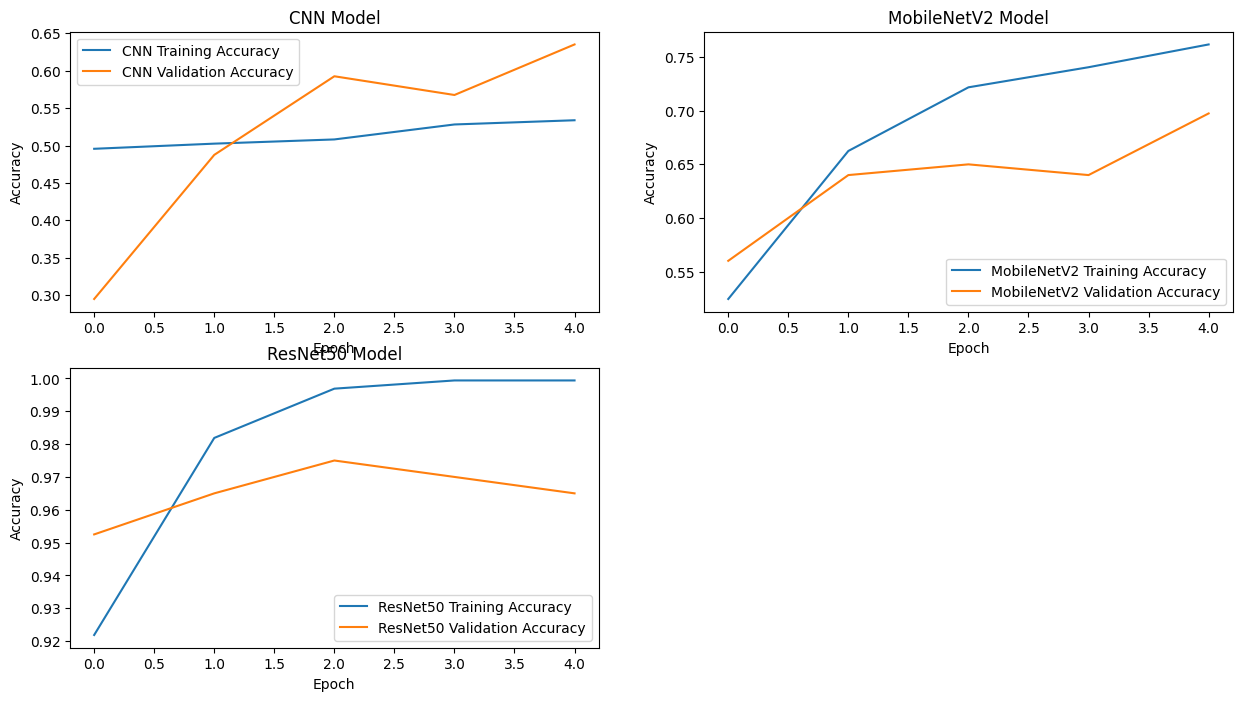

In [24]:
# Plot the training and validation accuracy for all models
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(mobilenet_history.history['accuracy'], label='MobileNetV2 Training Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNetV2 Validation Accuracy')
plt.title('MobileNetV2 Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(resnet_history.history['accuracy'], label='ResNet50 Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet50 Validation Accuracy')
plt.title('ResNet50 Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

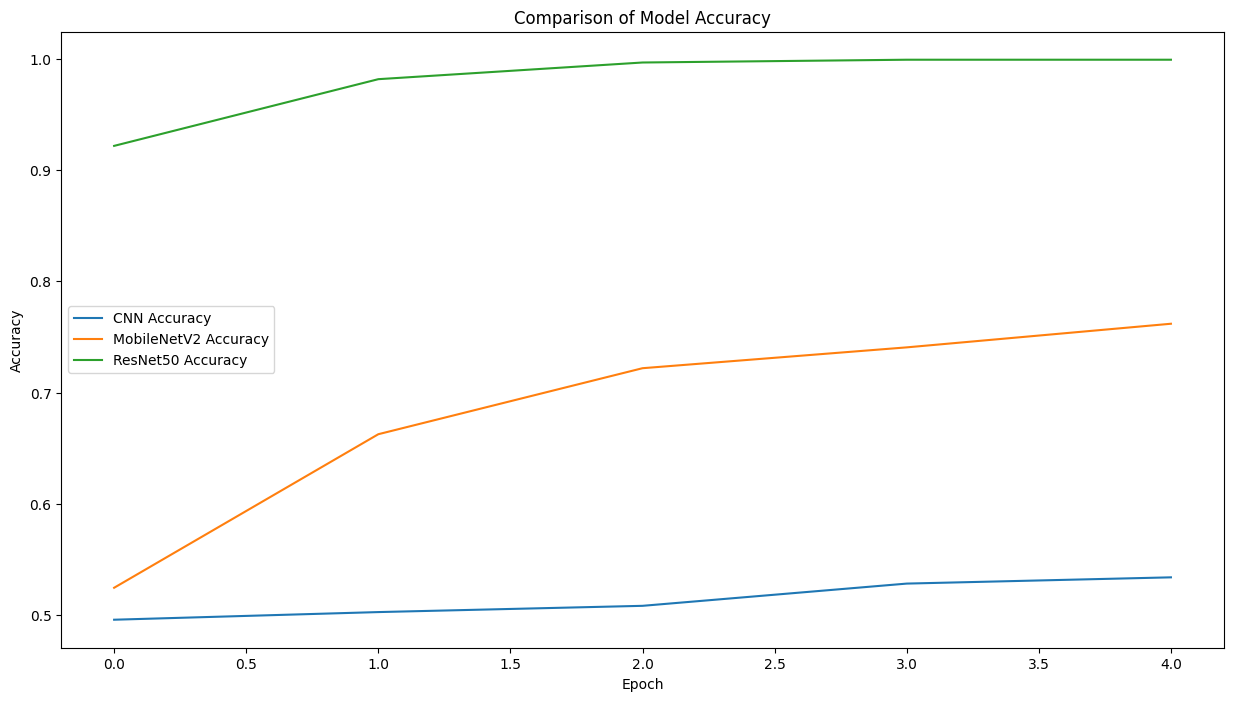

In [25]:
# Plot the training and validation accuracy for all models in a single graph
plt.figure(figsize=(15, 8))

# Plot CNN
plt.plot(cnn_history.history['accuracy'], label='CNN Accuracy')
# plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')

# Plot MobileNetV2
plt.plot(mobilenet_history.history['accuracy'], label='MobileNetV2 Accuracy')
# plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNetV2 Validation Accuracy')

# Plot ResNet50
plt.plot(resnet_history.history['accuracy'], label='ResNet50 Accuracy')
# plt.plot(resnet_history.history['val_accuracy'], label='ResNet50 Validation Accuracy')

# Customize the plot
plt.title('Comparison of Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 185ms/step


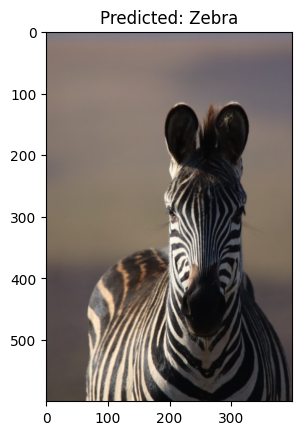

In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    return img_array

# Function to make predictions on a single image
def predict_single_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    return predicted_class

# Test the model on a few images
test_images = [
    "/drive/MyDrive/CS583 Project/Data/Zebra/Zebra_503.jpg",

    # Add more test image paths as needed
]

for img_path in test_images:
    predicted_class = predict_single_image(resnet_model, img_path)

    # Map the predicted class index back to the original label
    predicted_label = label_encoder.classes_[predicted_class]

    # Display the image and predicted label
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.show()